In [7]:
import rioxarray as rxr
import rasterio

In [24]:
path = './../data/tif/liquid_water_2022-12-25.tif'
data = rxr.open_rasterio(path)

In [8]:
da = rasterio.open(path)

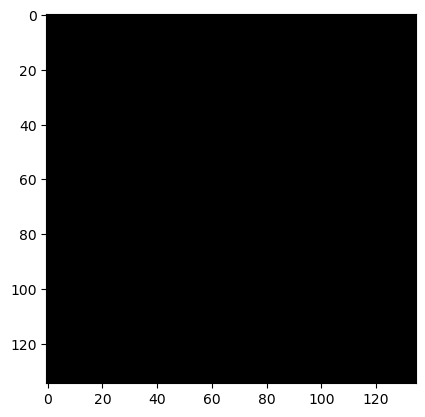

In [4]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from PIL import Image
def on_press(event):
    print("my position:" ,event.button,event.xdata, event.ydata)

fig = plt.figure()
img = Image.open('./../data/tif/liquid_water_2022-12-25.tif')
#updata = True

plt.imshow(img, animated= True)

fig.canvas.mpl_connect('button_press_event', on_press)
plt.show()
